# Лабораторная работа №1

In [913]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import integrate
from scipy.fft import fft

In [914]:
def cyclic_freq(T: float):
    return 2 * np.pi / T

In [915]:
def period(f: float):
    return 1 / f

## Задание 1

In [916]:
SAMPLE_RATE = 1000
T0 = -4
T1 = 4
T  = 1
A  = 2
N  = 10

In [917]:
def rect_func(x: float, A: float, w: float):
    return A * np.sign(np.sin(w * x))

In [918]:
def func_x(func, A: float, T: float, start_point: float, end_point: float, sample_rate: int):

    x = np.linspace(start_point, end_point, num = sample_rate, endpoint = False)
    y = np.apply_along_axis(lambda z: func(z, A, cyclic_freq(T)), 0, x)

    return x, y

In [919]:
def approx_func_x(func, N: int, A: int, T: float, x: np.ndarray):
    
    w  = cyclic_freq(T)
    a0 = 2 / T * integrate.quad(func, 0, T, args = (A, w))[0]
    an = lambda n: 2 / T * integrate.quad(lambda z: func(z, A, w) * np.cos(n * w * z), 0, T)[0]
    bn = lambda n: 2 / T * integrate.quad(lambda z: func(z, A, w) * np.sin(n * w * z), 0, T)[0]

    y  = lambda t: a0 / 2 + \
            np.sum([an(n) * np.cos(n * w * t) + bn(n) * np.sin(n * w * t) for n in range(1, N)], axis = 0)

    return np.apply_along_axis(y, 0, x)


In [920]:
def error_func(true_vals: np.ndarray, approx_vals: np.ndarray):
    return true_vals - approx_vals

In [921]:
x, y0 = func_x(rect_func, A, T, T0, T1, SAMPLE_RATE)
y1 = approx_func_x(rect_func, N, A, T, x)
y2 = error_func(y0, y1)

# plt.plot(a,'go--')
# plt.plot(b,'ro--')
# plt.show()

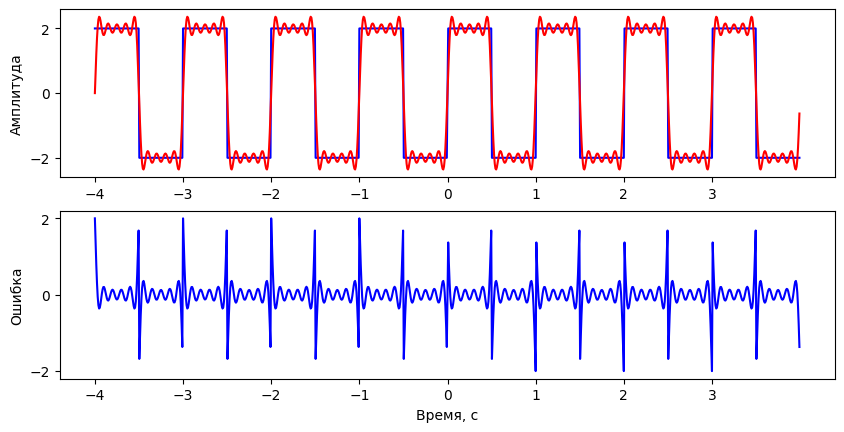

In [922]:
fig, axs = plt.subplots(2, 1)
fig.set_figwidth(10)

axs[0].plot(x, y0, color = 'blue')
axs[0].plot(x, y1, color = 'red')
axs[1].plot(x, y2, color = 'blue')

axs[0].set_ylabel('Амплитуда')
axs[1].set_ylabel('Ошибка')
axs[1].set_xlabel('Время, с')

axs[0].set_xticks(np.unique(np.int16(x)))
axs[0].set_yticks([-A, 0, A])
axs[1].set_xticks(np.unique(np.int16(x)))
axs[1].set_yticks([-A, 0, A])

plt.show()

## Задание 2

In [923]:
def cos_func(x: float, A: float, w: float):
    return A * np.cos(w * x)

In [924]:
SAMPLE_RATE = 1000
T0 = -0.05
T1 = 0.05
A  = 2
F  = 100
N  = 10

In [925]:
T = period(F)
w = cyclic_freq(T)

In [926]:
x, y0 = func_x(cos_func, A, T, T0, T1, SAMPLE_RATE)
y1 = fft(y0)

an = lambda n: 2 / T * integrate.quad(lambda z: cos_func(z, A, w) * np.cos(n * w * z), 0, T)[0]
a = [an(n) for n in range(1, N)]

c:\Users\Sanya\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


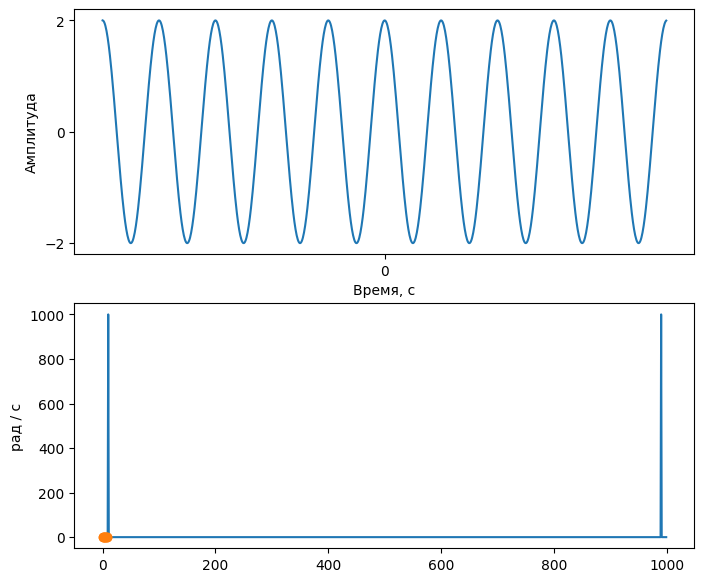

In [927]:
fig, axs = plt.subplots(2, 1)

fig.set_figwidth(8)
fig.set_figheight(7)

axs[0].plot(x, y0)
axs[1].plot(y1)
axs[1].plot(a, 'o--')

axs[0].set_ylabel('Амплитуда')
axs[0].set_xlabel('Время, с')

axs[1].set_ylabel('рад / c')

axs[0].set_xticks(np.unique(np.int16(x)))
axs[0].set_yticks([-A, 0, A])